In [27]:
# 周内效应
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
import numpy as np


In [2]:
sh000300 = ak.stock_zh_index_daily(symbol="sh000300")

In [3]:
sh000300

,date,open,high,low,close,volume
0,2002-01-04,1316.455,1316.455,1316.455,1316.455,0
1,2002-01-07,1302.084,1302.084,1302.084,1302.084,0
2,2002-01-08,1292.714,1292.714,1292.714,1292.714,0
3,2002-01-09,1272.645,1272.645,1272.645,1272.645,0
4,2002-01-10,1281.261,1281.261,1281.261,1281.261,0
...,...,...,...,...,...,...
4988,2022-07-27,4236.154,4242.095,4217.281,4225.036,7890494000
4989,2022-07-28,4242.274,4267.918,4223.029,4225.673,10753193000
4990,2022-07-29,4226.425,4243.514,4160.874,4170.102,11417928600
4991,2022-08-01,4160.648,4196.574,4129.453,4188.678,10774902900


In [4]:
ss600000 = ak.stock_zh_a_hist(symbol="600000")

In [38]:
ss600000=ss600000[3000:]

In [11]:
2.915701e+08/0.14

2082643571.4285712

In [12]:
4.859102e+09/54.4

89321727.94117647

In [9]:
1.769972e+08/0.08

2212465000.0

In [58]:
ss600000['turn'] = ss600000["换手率"]

/tmp/ipykernel_2796209/1956101752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss600000['turn'] = ss600000["换手率"]


In [40]:
ss600000['avg_price'] = np.round(ss600000["开盘"] + ss600000["收盘"])/2

/tmp/ipykernel_2796209/1436604880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss600000['avg_price'] = np.round(ss600000["开盘"] + ss600000["收盘"])/2


In [41]:
df=ss600000.sort_values(by='日期',ascending=False).reset_index(drop=True)
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,turn,avg_price
0,2022-08-02,7.22,7.14,7.22,7.07,409861,291570127.0,2.07,-1.24,-0.09,0.14,0.0014,7.0
1,2022-08-01,7.26,7.23,7.28,7.21,244380,176997249.0,0.96,-0.41,-0.03,0.08,0.0008,7.0
2,2022-07-29,7.35,7.26,7.35,7.23,438733,319838541.0,1.64,-0.95,-0.07,0.15,0.0015,7.5
3,2022-07-28,7.35,7.33,7.37,7.32,215244,158047423.0,0.68,-0.14,-0.01,0.07,0.0007,7.5
4,2022-07-27,7.36,7.34,7.37,7.33,170364,125085329.0,0.54,-0.54,-0.04,0.06,0.0006,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,2012-08-20,7.52,7.52,7.56,7.46,270382,202877230.0,1.32,-0.40,-0.03,0.18,0.0018,7.5
2386,2012-08-17,7.52,7.55,7.58,7.51,333227,251555254.0,0.93,0.27,0.02,0.22,0.0022,7.5
2387,2012-08-16,7.59,7.53,7.59,7.50,406303,306256976.0,1.19,-0.66,-0.05,0.27,0.0027,7.5
2388,2012-08-15,7.80,7.58,7.80,7.55,895552,683068992.0,3.21,-2.82,-0.22,0.60,0.0060,7.5


In [62]:
df['turn_tomo']=df['turn'].shift(1) 

In [63]:
df['remain_day']=1-df['turn_tomo']

In [64]:
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,turn,avg_price,turn_tomo,remain_day,remain_his
0,2022-08-02,7.22,7.14,7.22,7.07,409861,291570127.0,2.07,-1.24,-0.09,0.14,0.0014,7.0,NaN,NaN,1.400000e-03
1,2022-08-01,7.26,7.23,7.28,7.21,244380,176997249.0,0.96,-0.41,-0.03,0.08,0.0008,7.0,0.0014,0.9986,7.988800e-04
2,2022-07-29,7.35,7.26,7.35,7.23,438733,319838541.0,1.64,-0.95,-0.07,0.15,0.0015,7.5,0.0008,0.9992,1.496702e-03
3,2022-07-28,7.35,7.33,7.37,7.32,215244,158047423.0,0.68,-0.14,-0.01,0.07,0.0007,7.5,0.0015,0.9985,6.974131e-04
4,2022-07-27,7.36,7.34,7.37,7.33,170364,125085329.0,0.54,-0.54,-0.04,0.06,0.0006,7.5,0.0007,0.9993,5.973642e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,2012-08-20,7.52,7.52,7.56,7.46,270382,202877230.0,1.32,-0.40,-0.03,0.18,0.0018,7.5,0.0024,0.9976,1.212384e-08
2386,2012-08-17,7.52,7.55,7.58,7.51,333227,251555254.0,0.93,0.27,0.02,0.22,0.0022,7.5,0.0018,0.9982,1.479135e-08
2387,2012-08-16,7.59,7.53,7.59,7.50,406303,306256976.0,1.19,-0.66,-0.05,0.27,0.0027,7.5,0.0022,0.9978,1.811309e-08
2388,2012-08-15,7.80,7.58,7.80,7.55,895552,683068992.0,3.21,-2.82,-0.22,0.60,0.0060,7.5,0.0027,0.9973,4.014263e-08


In [65]:
df['remain_his']=df['remain_day'].cumprod()*df['turn']
df['remain_his']=df['remain_his'].fillna(df['turn'])

In [66]:
ss=df.groupby('avg_price')[['remain_his']].sum()

In [67]:
ss.remain_his.sum()

0.9999933676600438

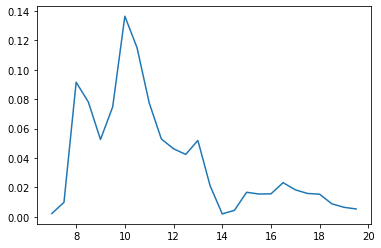

In [68]:
plt.plot(ss)

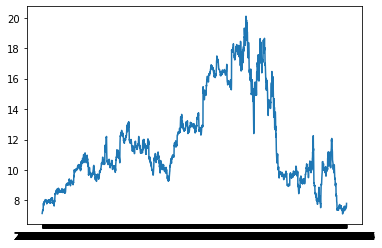

In [57]:
plt.plot(df["日期"],df["收盘"])